<a href="https://colab.research.google.com/github/Ethan-Jeong/test_deeplearning/blob/master/Naver_shopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python -m pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 86 kB 3.9 MB/s 
     |████████████████████████████████| 448 kB 29.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0   123k      0 --:--:-- --:--:-- --:--:--  123k


In [3]:
!bash ./mecab.sh

Installing automake (A dependency for mecab-ko)
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [62.9 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease

In [4]:
!curl -O https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0  16.2M      0  0:00:01  0:00:01 --:--:-- 16.2M


In [5]:
import pandas as pd

In [23]:
total_data = pd.read_table('./naver_shopping.txt',names=['ratings','reviews'])
total_data.head(10)


,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


In [9]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [12]:
total_data.drop_duplicates(subset=['reviews'],inplace=True)

In [13]:
len(total_data)

199908

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_data = total_data['reviews']
y_data = total_data['ratings']

In [34]:
x_train ,x_test , y_train , y_test  = train_test_split(x_data,y_data)
x_train.shape , x_test.shape , y_train.shape  , y_test.shape 


((149931,), (49977,), (149931,), (49977,))

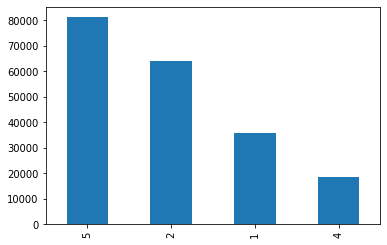

In [22]:
y_data.value_counts().plot(kind='bar')

# NLP

In [25]:
# x_train.str.replace('[가-힣ㄱ-ㅎㅠ ]','')

TypeError: ignored

In [26]:
from konlpy.tag import Mecab

In [29]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는게 나을 것 같다.'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '것', '같', '다', '.']


In [39]:
x_train_small = x_train[0:5000]

In [ ]:
sentence = list()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']


for tok in  x_train_small:
  encoded = mecab.morphs(tok)
  sentence.append([ item for item in encoded if item not in stopwords ])
sentence

## Tokenizer

In [49]:
print(sentence)

[['배송', '빨리', '되', '튼튼', '니', '이뻐요', '.', '잠금', '처리', '부분', '맘', '드', '네요'], ['세탁', '해서', '입', '었', '는데', '가렵', '따가워', '요'], ['재', '구매', '사용', '기', '너무', '편해서', '재', '구매', '햇', 'ㅇㅓ요'], ['불판', '갈라져서', '틈새', '로', '기름', '새', '어', '나오', '면서', '불', '붙', '엉망', '네요', '이런', '제품', '다른', '고객', '한테', '판매', '않', '았', '으면', '네요'], ['물품', '안', '전하', '잘', '받', '았', '습니다', '!', '!'], ['기대', '했', '던', '것', '보다', '안', '튼튼', '해요', 'ㅠㅠ'], ['한복', '속바지', '대신', '입', '으려고', '구매', '했', '습니다', '.', '길이', '넉넉', '좋', '았', '습니다', '.'], ['지속력', '이랑', '향', '먼가', '다른', '느낌', '어요'], ['줕이자', '마자', '위', '있', '큐빅', '떨어지', '큐빅', '던', '체', '분리', '되', '기', '했', '어요', 'ㅠㅠ'], ['앜ㅋ', '너무', '귀엽', '맘', '어요', '오늘', '소', '확', '행', 'ㅋㅋ'], ['싼', '가격', '산', '건대', '딱', '그', '가격', '정도', '네요', '.', '.', '마감', '처리', '별로', '부품', '몇', '개', '조립', '이랑', '안', '맞', '아서', '애먹', '었', '네요', '.', '솔직히', '다신', '안', '살', '거', '같', '아요', '.', '.', '그냥', '막', '쓰', '버릴', '렵니다'], ['예뻐', '여', '사이즈', '때문', '교환', '했었', '는데', '빠르', '더라', '구용'], ['생각', '보다',

In [43]:
import tensorflow as tf

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentence)

tokenizer.word_index

In [ ]:
tokenizer.word_counts

In [55]:
total_cnt = len(tokenizer.word_index)

In [58]:
rare_cnt = 0
total_freq, rare_freq = 0,0
for key,value in tokenizer.word_counts.items():
  total_freq = total_freq + value # 전체 단어의 수
  if(value <= 2):
    rare_cnt = rare_cnt+ 1
    rare_freq = rare_freq + value # 2 미만의 단어 수 

In [59]:
total_cnt , rare_cnt ,  rare_cnt/total_cnt , rare_freq/total_freq

(8112, 5331, 0.6571745562130178, 0.07744474212993972)

In [64]:
vocab_size = total_cnt - rare_cnt

In [67]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size,oov_token='OOV')
tokenizer.fit_on_texts(sentence)

In [ ]:
tokenizer.index_word

In [70]:
x_train_small = tokenizer.texts_to_sequences(sentence)

In [74]:
len(x_train_small[0]),len(x_train_small[40]),len(x_train_small[50])

(13, 21, 7)

In [76]:
hist_len = [ len(words) for words in x_train_small ] 

In [ ]:
import matplotlib.pyplot as plt
plt.hist(hist_len,bins=50)

In [81]:
sum( hist_len) /len(x_train_small)

16.7216

In [82]:
x_train_small = tf.keras.preprocessing.sequence.pad_sequences(x_train_small,maxlen=50)

In [84]:
y_train_small = y_train[0:5000]

In [85]:
import numpy as np
np.unique(y_train_small)

array([1, 2, 4, 5])

#make model

In [83]:
model = tf.keras.models.Sequential()

In [87]:
 

model.add(tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=30,input_length=50)) # input_dim 사전size , output_dim 임의의 값= 차원, input_length column 값

model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128))) # hidden 

model.add(tf.keras.layers.Dense(5,activation='softmax')) # ouput 

model.compile( optimizer='adam',loss='sparse_categorical_crossentropy' ,metrics=['acc'])

In [89]:
hist = model.fit(x_train_small,y_train,epochs=3,batch_size=256,validation_split=0.3)

Epoch 1/3


InvalidArgumentError: ignored